# Lead Scoring Case Study


## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing necessary libraries and understanding the data set

In [1]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset

Score=pd.read_csv('leads.csv')

Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataset

Score.shape

(9240, 37)

In [4]:
# data information

Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the Data

In [6]:
#percentage of null values

(Score.isnull().sum()/Score.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# Drop all the columns in which greater than 3000 missing values are present

for col in Score.columns:
    if Score[col].isnull().sum() > 3000:
        Score.drop(col, 1, inplace=True)

In [8]:
# Check the number of null values again

Score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Dropping unncessary columns

drop_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

Score_df=Score.drop(drop_cols,1)


In [10]:
Score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,No,No,Select,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,No,No,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,Select,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,No,No,Select,Modified


We can see some of the columns have  values mentioned as 'Select' which is of no use to us, so we need to identify and remove them

In [11]:
Score_df['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [12]:
Score_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [13]:
Score_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [14]:
#Dropping columns with high 'Select' values

Score_df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [15]:
#Dropping other unncessary columns where majorly one value is present or will not be useful in our analysis

Score_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content'], axis = 1, inplace = True)

In [16]:
# Check the number of null values again
Score_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Last Notable Activity                               0
dtype: int64

In [17]:
# Check for missing values

round(Score_df.isnull().sum()/len(Score_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Last Notable Activity                             0.00
dtype: float64

We will try to impute the null values of 'What is your current occupation ' and 'What matters most to you in choosing a course '
because they might be important to analysis and we don't want to remove them

In [18]:

Score_df = Score_df[~pd.isnull(Score_df['What is your current occupation'])]

# Drop the null values in below columns



Score_df = Score_df[~pd.isnull(Score_df['TotalVisits'])]

Score_df = Score_df[~pd.isnull(Score_df['Lead Source'])]



In [19]:
# Check the null values again
Score_df.isnull().sum()

Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                   18
What is your current occupation                   0
What matters most to you in choosing a course    19
Last Notable Activity                             0
dtype: int64

In [20]:
Score_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,Modified


## Preparing the data for Modelling or Data Transformation

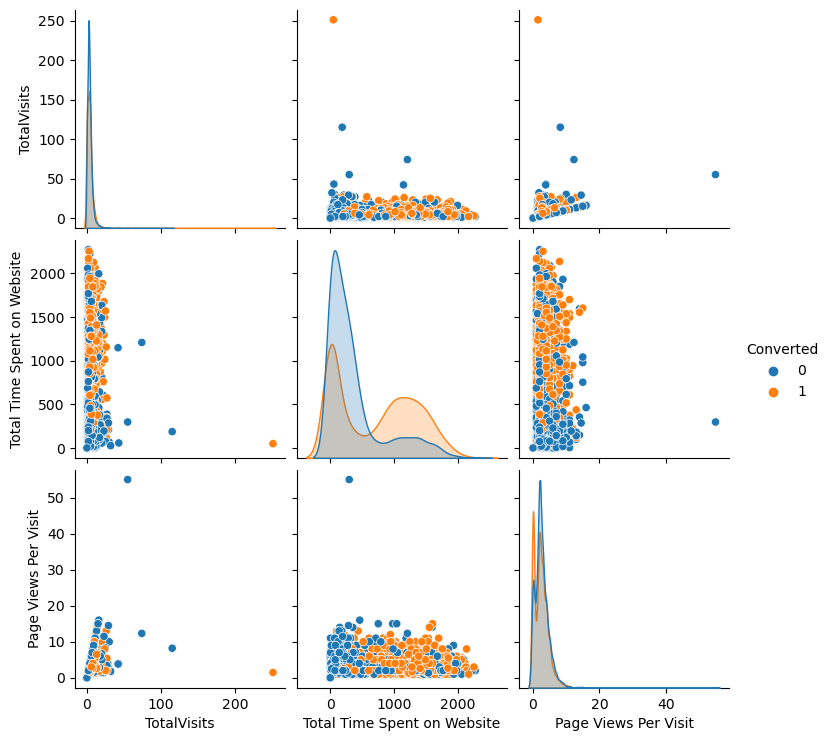

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(Score_df,diag_kind='kde',hue='Converted')
plt.show()

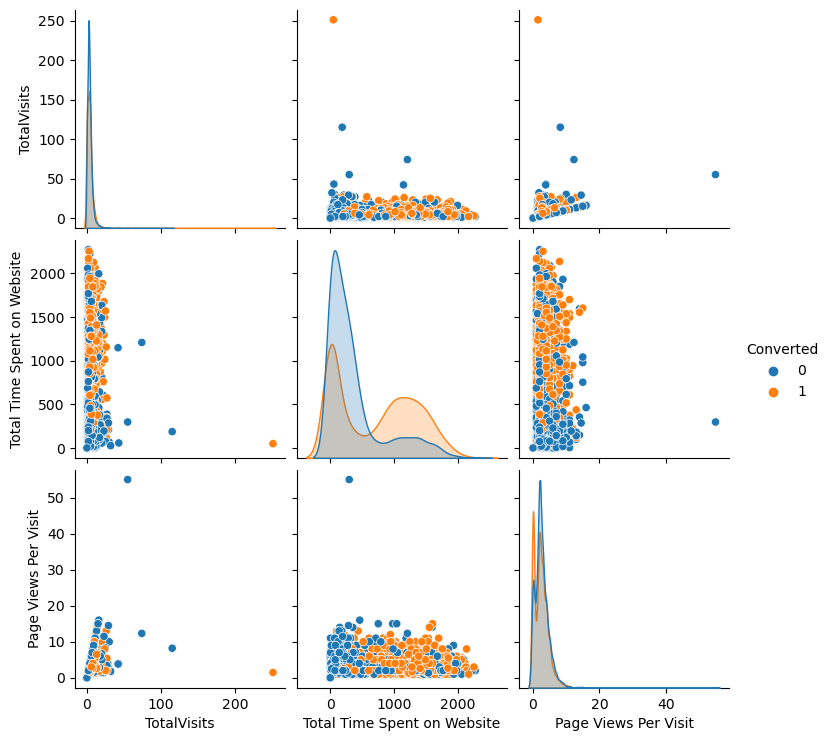

In [22]:
xedu = Score_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.540963,-1.533693,-1.535932,-0.959962
1,0.692399,0.641813,0.232323,-0.959962
2,-0.218779,1.263459,-0.017713,1.041708
3,-0.723550,0.152962,-0.629297,-0.959962
4,-0.218779,1.205019,-0.629297,1.041708


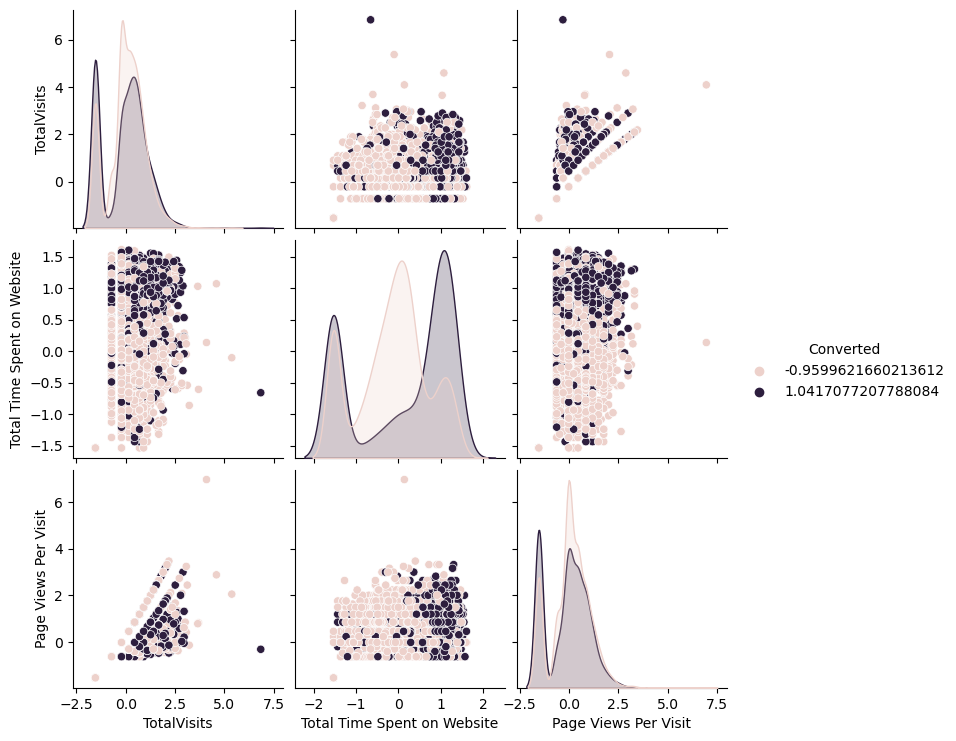

In [24]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

### Creating Dummy Variables

In [25]:
temp = Score_df.loc[:, Score_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [26]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Score_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Score_df = pd.concat([Score_df, dummy], axis=1)

In [27]:
# We will be creating dummy variable separately for 'Specialization' as it has the level 'Select' which is waste so we
# drop that 

dummy1 = pd.get_dummies(Score_df['Specialization'], prefix = 'Specialization')
dummy1 = dummy1.drop(['Specialization_Select'], 1)
Score_df = pd.concat([Score_df, dummy1], axis = 1)

In [28]:
# Drop the variables for which the dummy variables have been created

Score_df = Score_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation', 'Last Notable Activity'], 1)

In [29]:
#Checking head

Score_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Better Career Prospects,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Better Career Prospects,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Better Career Prospects,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Better Career Prospects,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Better Career Prospects,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Dropping the row 'What matters most to you in choosing a course'

Score_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [31]:
#Checking Head

Score_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split



In [32]:
# Import the required library

from sklearn.model_selection import train_test_split

In [33]:
# Put all the feature variables in X

X = Score_df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Put the target variable in y

y = Score_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [36]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
533,0.011952,0.364877,0.1875,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
846,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7546,0.035857,0.372359,0.5625,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8631,0.019920,0.397447,0.3125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7824,0.003984,0.081866,0.0625,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Checking the correlation

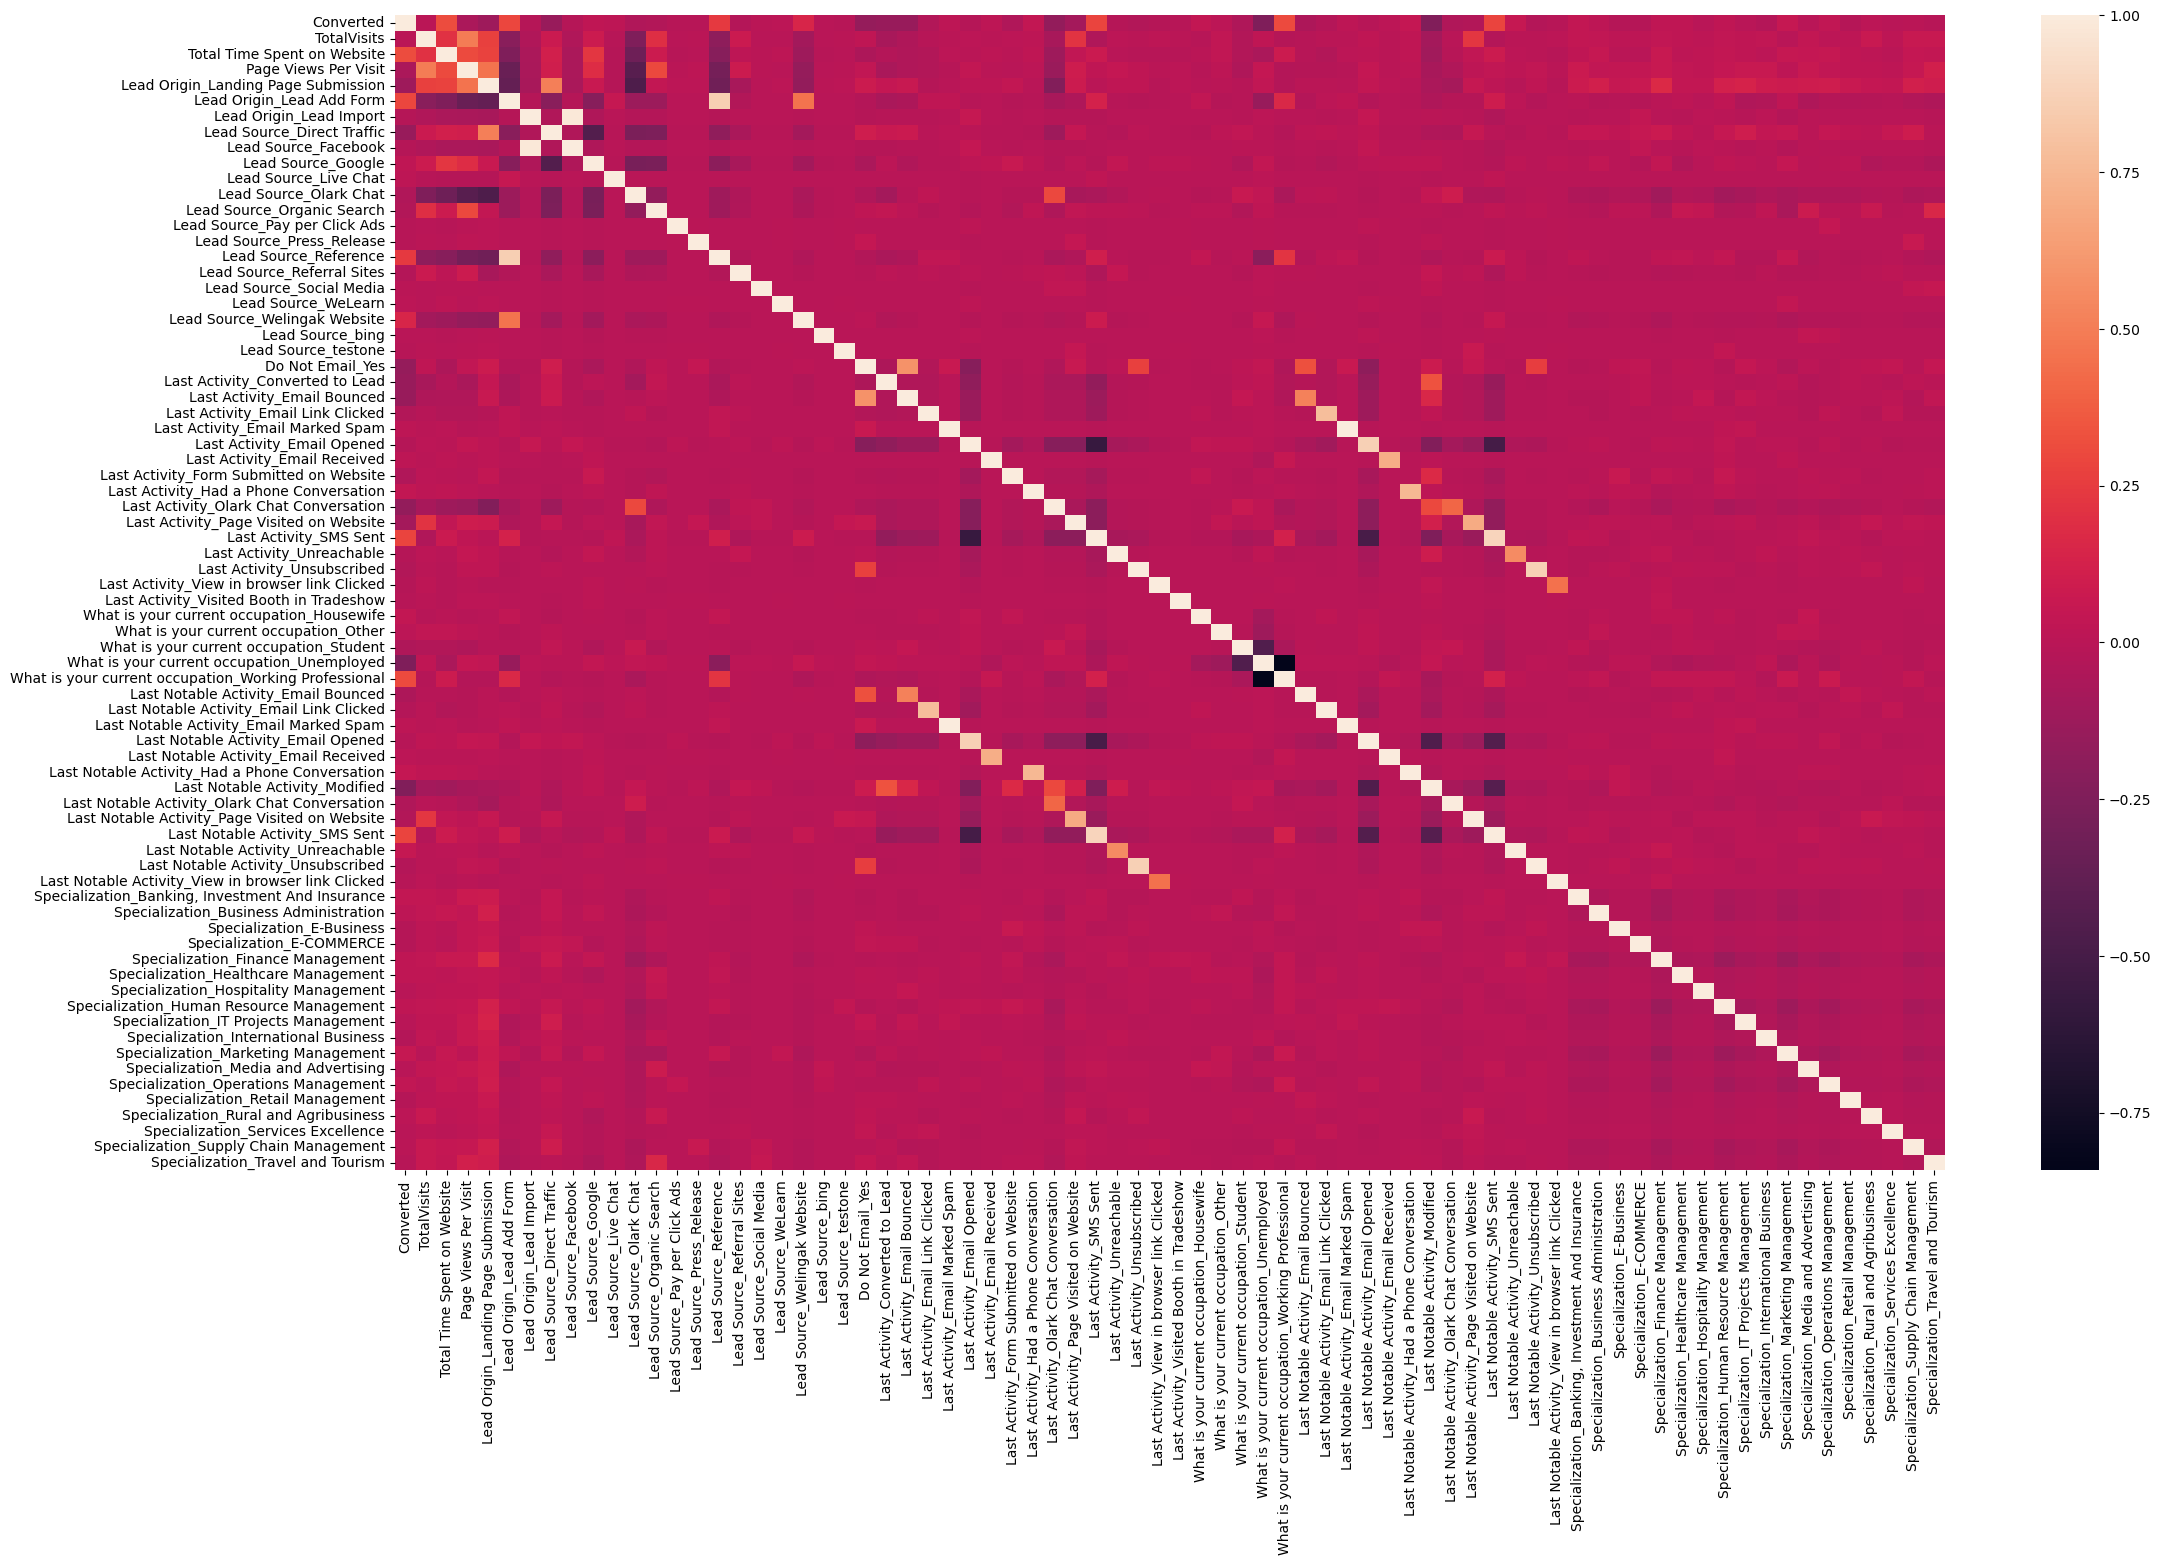

In [37]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(Score_df.corr())
plt.show()

## Model Building

In [38]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an instance of the estimator you want to use for feature selection, e.g., Logistic Regression
logreg = LogisticRegression()

# Create the RFE object with the estimator and the number of features to select (15 in this case)
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE object to your training data
rfe = rfe.fit(X_train, y_train)



In [40]:
# Features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_testone', False, 57),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link C

In [41]:
# Putting columns selected by RFE in the variable 'col' and displaying only RFE selected data

col = X_train.columns[rfe.support_]

X_train = X_train[col]

### First we will go with manual feature elimination using P-values and VIF. Columns with High p-values and VIF will be eliminated first.

In [50]:
# Importing statsmodels

import statsmodels.api as sm


# We will be Fitting a logistic Regression model on X_train 
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.6
Date:                Tue, 19 Sep 2023   Deviance:                       4125.2
Time:                        08:47:11   Pearson chi2:                 4.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3697
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0387      0.105     -9.865      0.000      -1.245      -0.832
TotalVisits                                             11.7498      3.008      3.906      0.000       5.854      17.645
Total Time Spent on Website                              4.5139      0.188     24.063      0.000       4.146       4.882
Lead Origin_Lead Add Form                                4.3911      0.235     18.685      0.000       3.931       4.852
Lead Source_Olark Chat                                   1.4994      0.125     11.995      0.000       1.254       1.744
Do Not Email_Yes                                        -1.4295      0.221     -6.466      0.000      -1.863      -0.996
Last Activity_Email Bounced                             -1.1395      0.431     -2.647      0.008      -1.983      -0.296
Last Activity_Had a Phone Conversation                   1.7537      0.720      2.435      0.015       0.342       3.165
What is your current occupation_Working Professional     2.4329      0.184     13.215      0.000       2.072       2.794
Last Notable Activity_Email Link Clicked                -1.4605      0.289     -5.050      0.000      -2.027      -0.894
Last Notable Activity_Email Opened                      -1.0438      0.098    -10.647      0.000      -1.236      -0.852
Last Notable Activity_Modified                          -1.6164      0.104    -15.590      0.000      -1.820      -1.413
Last Notable Activity_Olark Chat Conversation           -2.1172      0.378     -5.607      0.000      -2.857      -1.377
Last Notable Activity_Page Visited on Website           -1.5413      0.235     -6.571      0.000      -2.001      -1.082
Last Notable Activity_Unreachable                        2.2187      1.074      2.067      0.039       0.114       4.323
========================================================================================================================
"""

In [43]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.70
5,Do Not Email_Yes,1.60
0,TotalVisits,1.59
6,Last Activity_Email Bounced,1.57
2,Lead Origin_Lead Add Form,1.50
10,Last Notable Activity_Email Opened,1.47
11,Last Notable Activity_Modified,1.39
4,Lead Source_Welingak Website,1.33
3,Lead Source_Olark Chat,1.21
8,What is your current occupation_Working Profes...,1.19


In [45]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [46]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.6
Date:                Tue, 19 Sep 2023   Deviance:                       4125.2
Time:                        08:45:43   Pearson chi2:                 4.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3697
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0387      0.105     -9.865      0.000      -1.245      -0.832
TotalVisits                                             11.7498      3.008      3.906      0.000       5.854      17.645
Total Time Spent on Website                              4.5139      0.188     24.063      0.000       4.146       4.882
Lead Origin_Lead Add Form                                4.3911      0.235     18.685      0.000       3.931       4.852
Lead Source_Olark Chat                                   1.4994      0.125     11.995      0.000       1.254       1.744
Do Not Email_Yes                                        -1.4295      0.221     -6.466      0.000      -1.863      -0.996
Last Activity_Email Bounced                             -1.1395      0.431     -2.647      0.008      -1.983      -0.296
Last Activity_Had a Phone Conversation                   1.7537      0.720      2.435      0.015       0.342       3.165
What is your current occupation_Working Professional     2.4329      0.184     13.215      0.000       2.072       2.794
Last Notable Activity_Email Link Clicked                -1.4605      0.289     -5.050      0.000      -2.027      -0.894
Last Notable Activity_Email Opened                      -1.0438      0.098    -10.647      0.000      -1.236      -0.852
Last Notable Activity_Modified                          -1.6164      0.104    -15.590      0.000      -1.820      -1.413
Last Notable Activity_Olark Chat Conversation           -2.1172      0.378     -5.607      0.000      -2.857      -1.377
Last Notable Activity_Page Visited on Website           -1.5413      0.235     -6.571      0.000      -2.001      -1.082
Last Notable Activity_Unreachable                        2.2187      1.074      2.067      0.039       0.114       4.323
========================================================================================================================
"""

In [51]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.70
4,Do Not Email_Yes,1.60
0,TotalVisits,1.59
5,Last Activity_Email Bounced,1.57
9,Last Notable Activity_Email Opened,1.47
10,Last Notable Activity_Modified,1.39
3,Lead Source_Olark Chat,1.21
7,What is your current occupation_Working Profes...,1.16
2,Lead Origin_Lead Add Form,1.15
12,Last Notable Activity_Page Visited on Website,1.15


All the variables have VIF less than 5 so we will focus on high p-values and drop them.

All the p-values are low now.

All the VIF values are below 5 which is okay

## MODEL EVALUATION

In [52]:
# predicting the probability on train set using 'predict'

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

533     0.894524
846     0.909587
7546    0.743340
8631    0.348189
7824    0.096325
4986    0.737302
5542    0.406737
1719    0.263271
4860    0.989006
8609    0.213375
dtype: float64

In [53]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89452369, 0.90958678, 0.74334037, 0.34818914, 0.09632504,
       0.73730166, 0.40673705, 0.26327053, 0.98900572, 0.21337515])

In [54]:
# Wewill have a new dataframe wherein we will have actual conversion as against probability predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.894524
1,1,0.909587
2,1,0.743340
3,0,0.348189
4,0,0.096325


We can clearly see that whne probability is high then lead is converted.

So , we will make another column predicted when Probability >0.5

In [55]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.894524,1
1,1,0.909587,1
2,1,0.743340,1
3,0,0.348189,0
4,0,0.096325,0


### Confusion matrix

In [56]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1968  381]
 [ 561 1563]]


TP= true positive 
TN=true negatives
FP=false positives
FN=false negatives



In [59]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [57]:
#Checking the accuracy



print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.789403085177733


In [60]:
# Sensitivity

TP/(TP+FN)

0.7358757062146892

In [61]:
# Specificity

TN/(TN+FP)

0.8378033205619413

### Finding the optimum threshold value of probability using ROC curve, sensitivity and specificity tradeoff

In [62]:


# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

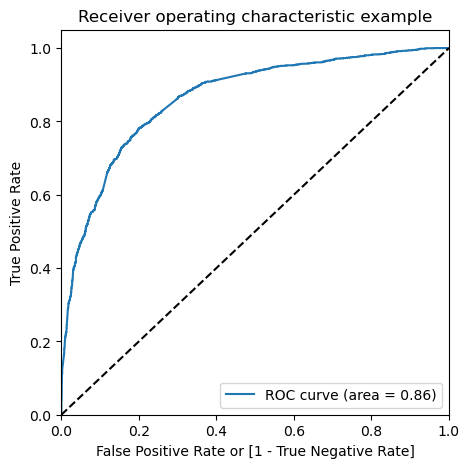

In [63]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )



#Importing matplotlib

import matplotlib.pyplot as plt

#Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Aea under ROC curve is 0.86 which means our model is good.

In [65]:
# We will be creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.894524,1,1,1,1,1,1,1,1,1,1,0
1,1,0.909587,1,1,1,1,1,1,1,1,1,1,1
2,1,0.743340,1,1,1,1,1,1,1,1,1,0,0
3,0,0.348189,0,1,1,1,1,0,0,0,0,0,0
4,0,0.096325,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.551755  0.986817  0.158365
0.2   0.2  0.693718  0.943032  0.468284
0.3   0.3  0.767941  0.890301  0.657301
0.4   0.4  0.784932  0.799435  0.771818
0.5   0.5  0.789403  0.735876  0.837803
0.6   0.6  0.778448  0.669021  0.877395
0.7   0.7  0.745808  0.552731  0.920392
0.8   0.8  0.716968  0.453861  0.954874
0.9   0.9  0.654594  0.291431  0.982971


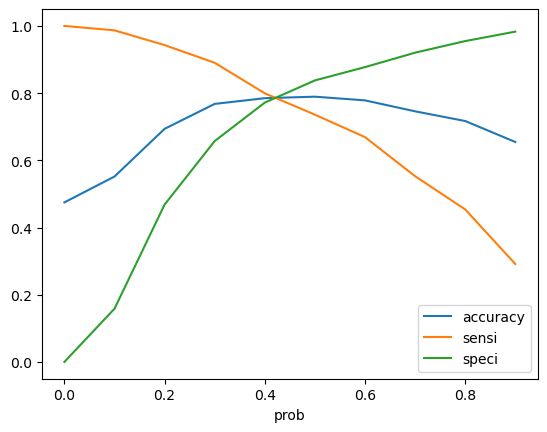

In [68]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### We can see that the optimal value is at the intersection of accuracy , sensitivity and specificity, so cut-off value will be 0.42.

In [69]:
#Again checking the values of accuracy, sesitivity and specificity at cut-off probability 0.42


y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.894524,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.909587,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.743340,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.348189,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.096325,0,1,0,0,0,0,0,0,0,0,0,0


### Accuracy

In [70]:
#accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7885088307623519

#### Confusion Matrix

In [72]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  497],
       [ 449, 1675]])

In [73]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sesitivity

In [74]:
# Sensitivity

TP/(TP+FN)

0.7886064030131826

#### Specificity

In [75]:
# Specificity

TN/(TN+FP)

0.7884206045125586

#### Precison and Recall

In [102]:
#Precision 


confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.8040123456790124

In [103]:
#Recall


confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7358757062146892

### Making Predictions

In [76]:
# Scaling the test set using 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [77]:
# Selected the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,0.015936,0.485915,0,0,0,0,0,0,1,0,0,0,0,0,0
4301,0.003984,0.144366,0,1,0,1,0,0,0,0,0,0,0,0,0
5904,0.011952,0.174296,0,0,0,1,0,0,0,0,0,0,0,1,0
6881,0.035857,0.069102,0,0,0,1,1,0,0,0,0,1,0,0,0
5195,0.015936,0.571303,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
# Adding constant

X_test_sm = sm.add_constant(X_test[col])



X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,1.0,0.015936,0.485915,0,0,0,0,0,0,1,0,0,0,0,0,0
4301,1.0,0.003984,0.144366,0,1,0,1,0,0,0,0,0,0,0,0,0
5904,1.0,0.011952,0.174296,0,0,0,1,0,0,0,0,0,0,0,1,0
6881,1.0,0.035857,0.069102,0,0,0,1,1,0,0,0,0,1,0,0,0
5195,1.0,0.015936,0.571303,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,1.0,0.027888,0.426937,0,0,0,0,0,0,0,0,1,0,0,0,0
7454,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0
8201,1.0,0.007968,0.557218,0,0,0,0,0,0,0,0,0,1,0,0,0
7979,1.0,0.011952,0.451144,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Welingak Website'], 1, inplace = True)

In [85]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))



y_test_pred[:10]

2938    0.977573
4301    0.432827
5904    0.043845
6881    0.011087
5195    0.849073
7243    0.600248
901     0.589828
3943    0.239449
4971    0.909932
1792    0.290725
dtype: float64

In [109]:
#Converting to dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
2938,0.977573
4301,0.432827
5904,0.043845
6881,0.011087
5195,0.849073


In [87]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [88]:
# Removing index so that we can concatanate them together

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Conctanate

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.977573
1,0,0.432827
2,0,0.043845
3,0,0.011087
4,1,0.849073


In [89]:
# Rename the column as Conversion probability

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.977573
1,0,0.432827
2,0,0.043845
3,0,0.011087
4,1,0.849073


### Making predictions using the cut-off value of 0.42

In [91]:


y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)



y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.977573,1
1,0,0.432827,1
2,0,0.043845,0
3,0,0.011087,0
4,1,0.849073,1


#### Checking accuracy, specificity and sensistivity of the test

In [92]:
#Accuracy 




metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7883211678832117

In [93]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [94]:
#Sensitivity
TP / float(TP+FN)

0.7863974495217854

In [95]:
#Specificity
TN / float(TN+FP)

0.7901740020470829

In [106]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score:',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))   # Printing the precision score

print('Recall score:',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))      # Printing the recall score

Precision score: 0.783068783068783
Recall score: 0.7863974495217854


## Creating the Lead Score

In [112]:
# Creating new columns for lead number and lead score



y_pred_final['Lead Score']=y_pred_final['Conversion_Prob'].apply(lambda x:round(x*100))


y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,1,0.977573,1,98
1,0,0.432827,1,43
2,0,0.043845,0,4
3,0,0.011087,0,1
4,1,0.849073,1,85


## Conclusion

Insights of the Analysis -

With the current cut-off of 0.42, We have high recall score 0.786 which is marginally greater than precision score of 0.783 which we were exactly looking for.Accuracy of 0.788 with sensitivity and specificity value of 0.786 and 0.790 repectively. The leads which have High Conversion_Prob have a high Lead score while the one with lower Conversion_Prob have lower Lead score as per requirement specified by the company.This model has an ability to adjust with the company’s requirements in coming future.

Features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:

1.The total time spend on the Website
2.Total number of visits
3.Lead Origin_Lead Add Form
4.Current occupation_Working Professional
5.Last Notable Activity_Had a Phone Conversation


